<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4><b> PACKAGES DOWNLOADING </b> </h4>

In [1]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


<h4><b> PACAKAGES LOADING </b></h4>

In [2]:
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn.model_selection import train_test_split

<h4><b> DATASET LOADING </b></h4>

In [3]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

<h4><b> DATA TRANSFORMATION </b></h4>

In [4]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()

In [5]:
data1 = data1.reset_index()

In [6]:
data1.rename(columns={'Ship Date':'date','Sales':'sales'},inplace=True)

In [7]:
df_diff = data1.copy()
df_diff['prev_sales'] = df_diff['sales'].shift(1)
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['sales'] - df_diff['prev_sales'])
df_diff.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date,sales,prev_sales,diff
1,2014-02-01,112.4110,149.950,-37.5390
2,2014-03-01,483.5460,112.411,371.1350
3,2014-04-01,680.2520,483.546,196.7060
4,2014-05-01,504.8280,680.252,-175.4240
5,2014-06-01,656.0660,504.828,151.2380
6,2014-07-01,504.5860,656.066,-151.4800
7,2014-08-01,884.6660,504.586,380.0800
8,2014-09-01,947.6480,884.666,62.9820
9,2014-10-01,672.9930,947.648,-274.6550
10,2014-11-01,2202.8545,672.993,1529.8615


<h4><b>SHIFTING THE DATA </b></h4>

In [8]:
df_supervised = df_diff.drop(['prev_sales'],axis=1)
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
df_supervised = df_supervised.dropna().reset_index(drop=True)

In [9]:
df_supervised.head(10)

,date,sales,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2015-02-01,193.320,-808.572,-448.400,-752.5625,1529.8615,-274.6550,62.9820,380.0800,-151.4800,151.2380,-175.4240,196.7060,371.1350,-37.5390
1,2015-03-01,869.571,676.251,-808.572,-448.4000,-752.5625,1529.8615,-274.6550,62.9820,380.0800,-151.4800,151.2380,-175.4240,196.7060,371.1350
2,2015-04-01,646.701,-222.870,676.251,-808.5720,-448.4000,-752.5625,1529.8615,-274.6550,62.9820,380.0800,-151.4800,151.2380,-175.4240,196.7060
3,2015-05-01,613.698,-33.003,-222.870,676.2510,-808.5720,-448.4000,-752.5625,1529.8615,-274.6550,62.9820,380.0800,-151.4800,151.2380,-175.4240
4,2015-06-01,568.997,-44.701,-33.003,-222.8700,676.2510,-808.5720,-448.4000,-752.5625,1529.8615,-274.6550,62.9820,380.0800,-151.4800,151.2380
5,2015-07-01,919.115,350.118,-44.701,-33.0030,-222.8700,676.2510,-808.5720,-448.4000,-752.5625,1529.8615,-274.6550,62.9820,380.0800,-151.4800
6,2015-08-01,547.600,-371.515,350.118,-44.7010,-33.0030,-222.8700,676.2510,-808.5720,-448.4000,-752.5625,1529.8615,-274.6550,62.9820,380.0800
7,2015-09-01,2256.418,1708.818,-371.515,350.1180,-44.7010,-33.0030,-222.8700,676.2510,-808.5720,-448.4000,-752.5625,1529.8615,-274.6550,62.9820
8,2015-10-01,989.430,-1266.988,1708.818,-371.5150,350.1180,-44.7010,-33.0030,-222.8700,676.2510,-808.5720,-448.4000,-752.5625,1529.8615,-274.6550
9,2015-11-01,1941.838,952.408,-1266.988,1708.8180,-371.5150,350.1180,-44.7010,-33.0030,-222.8700,676.2510,-808.5720,-448.4000,-752.5625,1529.8615


In [10]:
len(df_supervised)

36

In [11]:
df_model = df_supervised.drop(['date','sales'],axis=1)
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

<h4><b>MIX MAX SCALER CONVERSION </b></h4>

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [13]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

In [ ]:
X_train

In [15]:
y_test

array([[ 0.3707856 ],
       [ 0.85295326],
       [-0.68132225],
       [ 0.5674062 ],
       [ 0.41737886],
       [-0.89225451]])

<h4> <b>XGBOOST MODEL BUILDING</b></h4>

In [16]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 50, seed = 123)

In [17]:
xgb_r.fit(X_train, y_train)

[09:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=50, seed=123)

In [19]:
xgb_r

XGBRegressor(n_estimators=50, seed=123)

<h4><b>PREDICTION</b></h4>

In [20]:
pred = xgb_r.predict(X_test)

<h4><b>ERROR CALCULATION</b></h4>

In [23]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE 
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, })
forecast_accuracy(pred,y_test)

{'mae': 0.642802566961818,
 'mape': 1.0233176990421788,
 'me': 0.004527926110203072,
 'mpe': -0.8999619438682974,
 'rmse': 0.7936712098477522}

In [24]:
pred = pred.reshape(y_test.shape)
pred

array([[ 0.09752437],
       [ 0.32270783],
       [-0.42135912],
       [ 0.57956254],
       [ 0.61957085],
       [-0.5358918 ]], dtype=float32)

In [25]:
y_pred = pred.reshape(y_test.shape)

<h4><b>DATA FRAME EXTRACTION</b></h4>

In [26]:
y_pred = y_pred.reshape(y_pred.shape[0],y_pred.shape[1])
pred_test_set = []
for index in range(0,len(y_pred)):
    print(np.concatenate([y_pred[index],X_test[index]]))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]]))
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[1])
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[ 0.09752437  0.15306959  0.0969      0.31223718  0.06080036  0.33473855
  0.20749561 -1.49691772  0.50156855  0.80504878 -1.17023556  0.73690758
 -0.26465099]
[ 0.32270783  0.3707856   0.15306959  0.0969      0.31223718  0.06080036
  0.33473855  0.01059088 -1.49691772  0.50156855  0.78845496 -1.17023556
  0.73690758]
[-0.42135912  0.85295326  0.3707856   0.15306959  0.0969      0.31223718
  0.06080036  0.16944845  0.01059088 -1.49691772  0.45914317  0.78845496
 -1.17023556]
[ 0.57956254 -0.68132225  0.85295326  0.3707856   0.15306959  0.0969
  0.31223718 -0.1725521   0.16944845  0.01059088 -1.70944981  0.45914317
  0.78845496]
[ 0.61957085  0.5674062  -0.68132225  0.85295326  0.3707856   0.15306959
  0.0969      0.14135642 -0.1725521   0.16944845 -0.07362543 -1.70944981
  0.45914317]
[-0.53589177  0.41737886  0.5674062  -0.68132225  0.85295326  0.3707856
  0.15306959 -0.1274832   0.14135642 -0.1725521   0.09875375 -0.07362543
 -1.70944981]


In [27]:
result_list = []
sales_dates = list(data1[-7:].date)
act_sales = list(data1[-7:].sales)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)

In [28]:
data2 = data1.copy()
df_re = df_result.copy()
data2  = data2.set_index('date')
df_re = df_re.set_index('date')

<h4><b>PLOTING</b></h4>

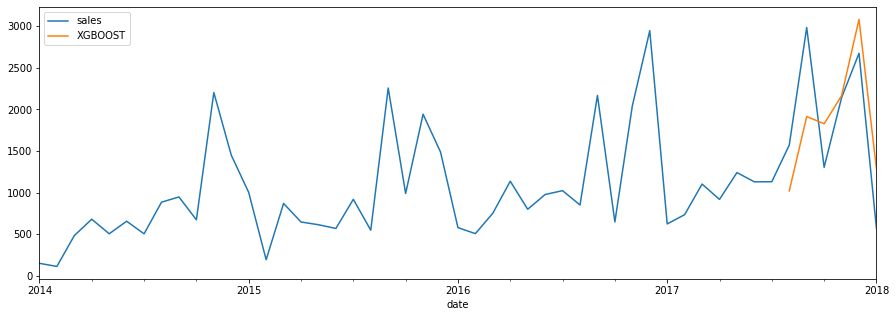

In [29]:
import matplotlib.pyplot as plt
ax = data2['sales'].plot(figsize=(15,5))
df_re['pred_value'].plot(ax=ax,label='XGBOOST')
plt.legend()
plt.show()